Importing Libraries

In [121]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import nan

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Loading dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df =pd.read_csv("/content/drive/MyDrive/Fall /Restaurant Startup Analysis/dataset/zomato.csv")

Dataset understanding

In [5]:
df.shape

(51717, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
df.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [9]:
df.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

**Data Cleaning**

Dropping unwanted columns

In [10]:
df.drop(['url','menu_item','phone','address','location','reviews_list','dish_liked'],axis=1,inplace=True)


In [11]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'cuisines', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

Removing duplicate rows

In [12]:
sum(df.duplicated())

124

In [13]:
df=df.drop_duplicates()

In [14]:
df.shape

(51593, 10)

Renaming some columns

In [15]:
df = df.rename(columns={'listed_in(type)':'type','listed_in(city)':'city','approx_cost(for two people)':'cost'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'cuisines', 'cost', 'type', 'city'],
      dtype='object')

Removing nan, NEW, - values from rate and converting into float

In [16]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
df["rate"]=df["rate"].replace("NEW", np.nan)
df['rate']=df['rate'].replace('NaN',np.nan)
df['rate']=df['rate'].replace('-',np.nan)
df['rate']=df['rate'].replace('nan',np.nan)

def five(value: str):
    if type(value)==str:
        value_new=value.split('/')[0]
        return value_new
    return value
df['rate']=df['rate'].apply(five)

df['rate']=df['rate'].astype(float)

df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

Converting strings from cost into numbers

In [18]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))
df['cost'] = df['cost'].astype(float)
df['cost'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost, dtype: float64

Removing missing data

In [19]:
df.isnull().sum()
df.dropna(how='any',inplace=True)

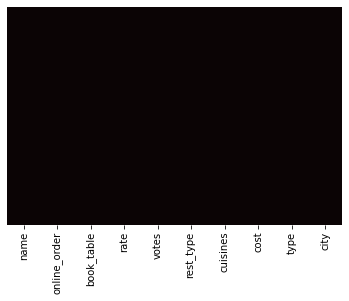

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41190 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  object 
 1   online_order  41190 non-null  object 
 2   book_table    41190 non-null  object 
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   rest_type     41190 non-null  object 
 6   cuisines      41190 non-null  object 
 7   cost          41190 non-null  float64
 8   type          41190 non-null  object 
 9   city          41190 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.5+ MB


**Exploratory Data Analysis**

Restaurants that offers table booking or not

In [22]:
print(df['book_table'].value_counts())

No     34915
Yes     6275
Name: book_table, dtype: int64


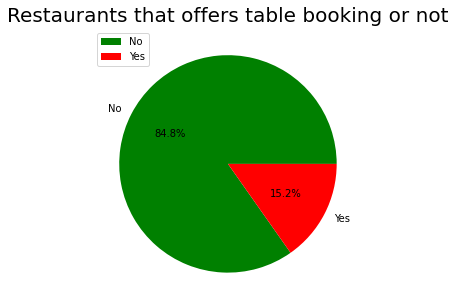

In [23]:
plt.figure(figsize=(5,5))
df['book_table'].value_counts().plot(kind='pie',colors=['green','red'],autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('Restaurants that offers table booking or not',size=20)
plt.xlabel('',size=10)
plt.ylabel('',size=10)
plt.legend(loc=2, prop={'size': 10})

Text(0.5, 1.0, 'Restaurants that offers table booking or not')

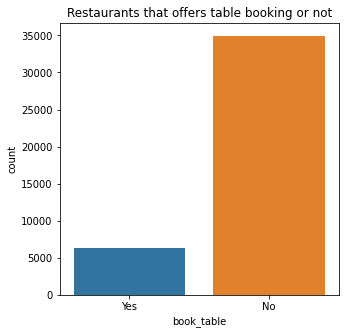

In [24]:
sns.countplot(df['book_table'])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title('Restaurants that offers table booking or not')

Restaurants that takes online orders or not

In [25]:
print(df['online_order'].value_counts())

Yes    27046
No     14144
Name: online_order, dtype: int64


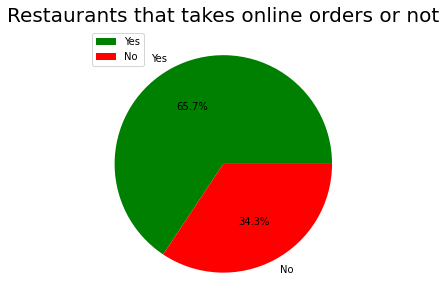

In [26]:
plt.figure(figsize=(5,5))
df['online_order'].value_counts().plot(kind='pie',colors=['green','red'],autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('Restaurants that takes online orders or not',size=20)
plt.xlabel('',size=10)
plt.ylabel('',size=10)
plt.legend(loc=2, prop={'size': 10})

Text(0.5, 1.0, 'Restaurants that takes online orders or not')

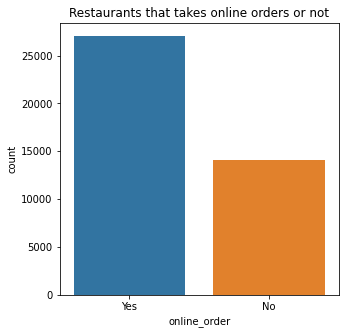

In [27]:
sns.countplot(df['online_order'])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title('Restaurants that takes online orders or not')

Best cuisines

In [28]:
cuisine=df.groupby('cuisines')['rate'].mean().reset_index().sort_values(by='rate',ascending=False)
cuisine.head(10)

,cuisines,rate
1001,"Continental, North Indian, Italian, South Indi...",4.900000
1274,"Healthy Food, Salad, Mediterranean",4.900000
172,"Asian, Chinese, Thai, Momos",4.900000
989,"Continental, North Indian, Chinese, European, ...",4.800000
192,"Asian, Mediterranean, North Indian, BBQ",4.800000
1816,"North Indian, European, Mediterranean, BBQ",4.800000
1087,"European, Mediterranean, North Indian, BBQ",4.789474
48,"American, Tex-Mex, Burger, BBQ, Mexican",4.750000
165,"Asian, Burmese",4.700000
219,"BBQ, North Indian, Continental, Chinese",4.700000


Restaurants count based on location

Text(0.5, 1.0, 'Restaurants count based on location')

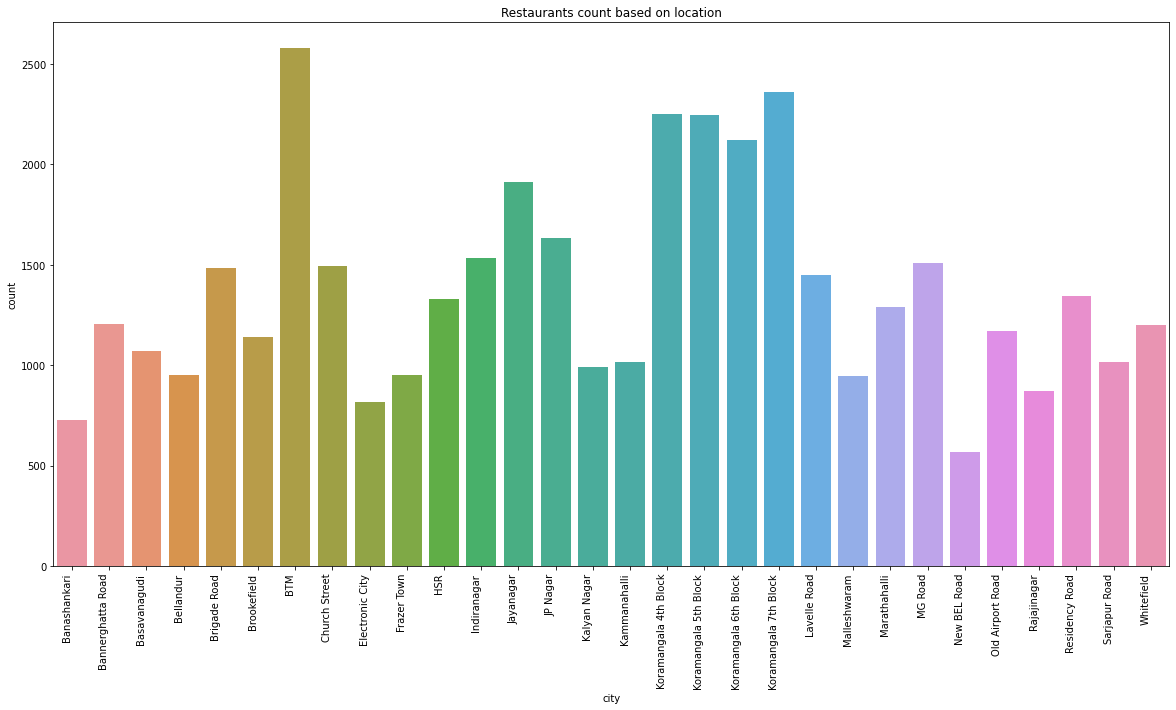

In [29]:
sns.countplot(df['city'])
sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Restaurants count based on location')

Service types

Text(0.5, 1.0, 'Service types')

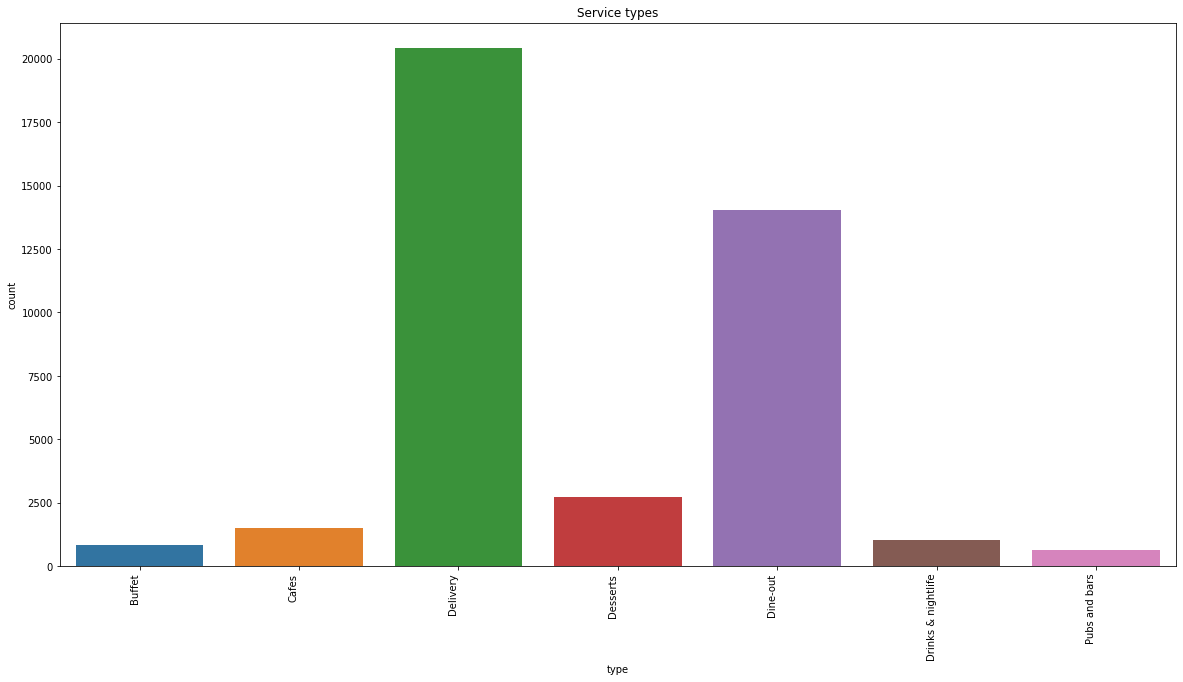

In [30]:
sns.countplot(df['type'])
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Service types')

Restaurant cost for two people


Text(0.5, 1.0, 'Restaurant cost')

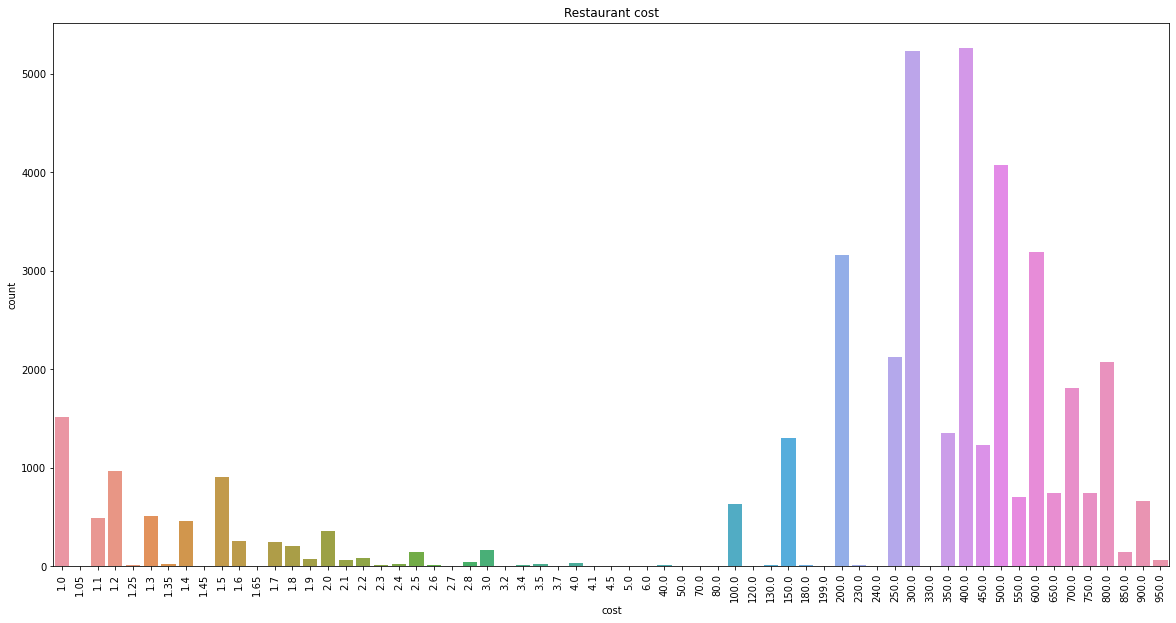

In [31]:
sns.countplot(df['cost'])
sns.countplot(df['cost']).set_xticklabels(sns.countplot(df['cost']).get_xticklabels(), rotation=90)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Restaurant cost')

Most common ratings

Text(0.5, 1.0, 'Restaurant ratings')

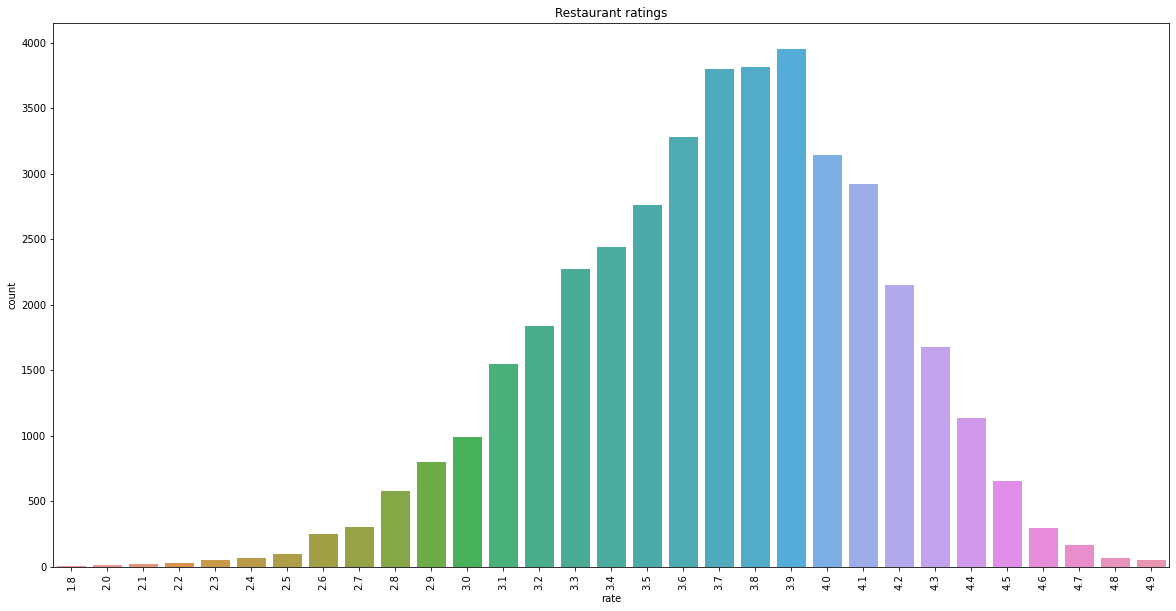

In [32]:
sns.countplot(df['rate'])
sns.countplot(df['rate']).set_xticklabels(sns.countplot(df['rate']).get_xticklabels(), rotation=90)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Restaurant ratings')

Relation between cost and rate

[Text(0, -200.0, '-200'),
 Text(0, 0.0, '0'),
 Text(0, 200.0, '200'),
 Text(0, 400.0, '400'),
 Text(0, 600.0, '600'),
 Text(0, 800.0, '800'),
 Text(0, 1000.0, '1,000')]

<Figure size 1440x720 with 0 Axes>

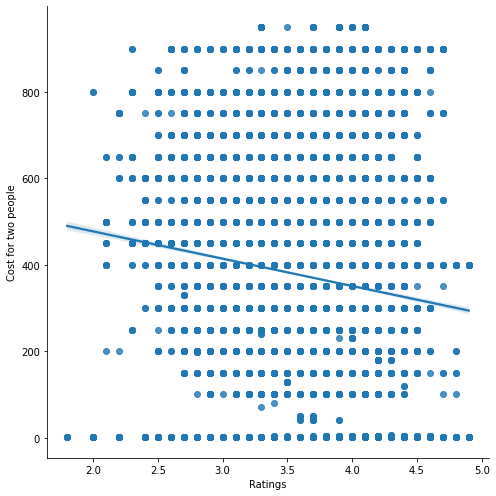

In [33]:
plt.figure(figsize=(20,10))
sns.lmplot(x='rate',y='cost',data=df,height=7)
plt.xlabel('Ratings',size=10)
plt.ylabel('Cost for two people',size=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
vc = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in vc])

Relation between rate and type

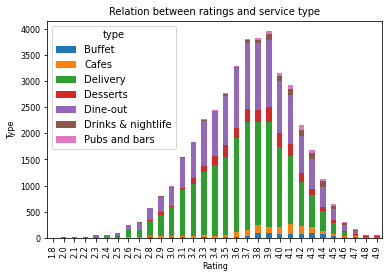

In [34]:
plt_rt=pd.crosstab(df['rate'],df['type'])
plt_rt.plot(kind='bar',stacked=True);
plt.title('Relation between ratings and service type',fontsize=10)
plt.ylabel('Type',fontsize=8)
plt.xlabel('Rating',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

Relation between cost and type

                 type        cost
5  Drinks & nightlife   48.998121
6       Pubs and bars   86.726746
0              Buffet  189.603251
3            Desserts  359.477519
4            Dine-out  363.860907
2            Delivery  396.678896
1               Cafes  517.038848


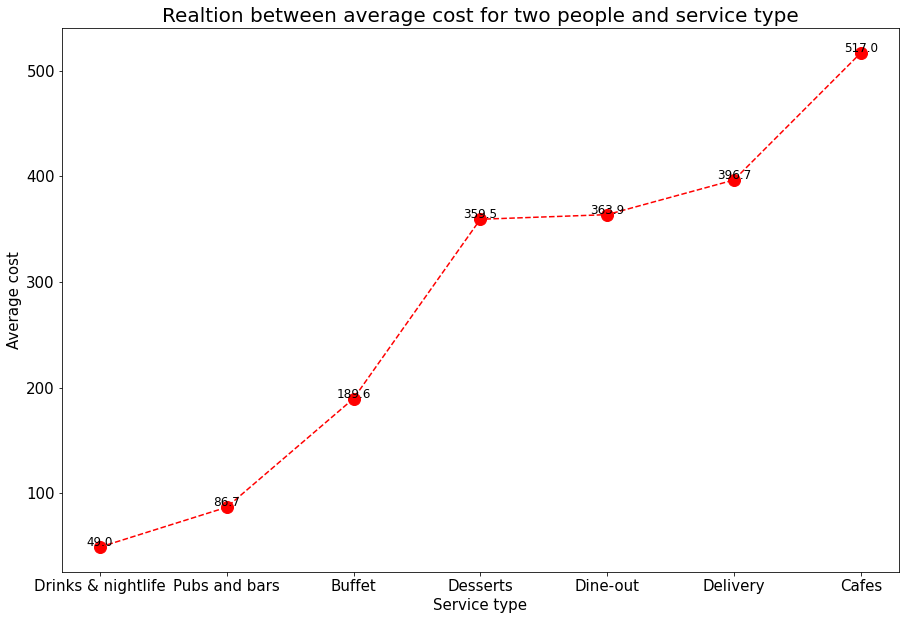

In [35]:
ct=df.groupby('type')['cost'].mean().reset_index().sort_values(by='cost')
print(ct)
plt.figure(figsize=(15,10))
plt.plot(ct['type'],ct['cost'],'o--r',ms=12)
plt.xlabel('Service type',size=15)
plt.ylabel('Average cost',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Realtion between average cost for two people and service type',size=20)
for a,b in enumerate(ct.cost):
    plt.text(a,b+1,round(b,1),fontsize=12,horizontalalignment='center')
plt.show()

Relation between rate and restaurants that take online order

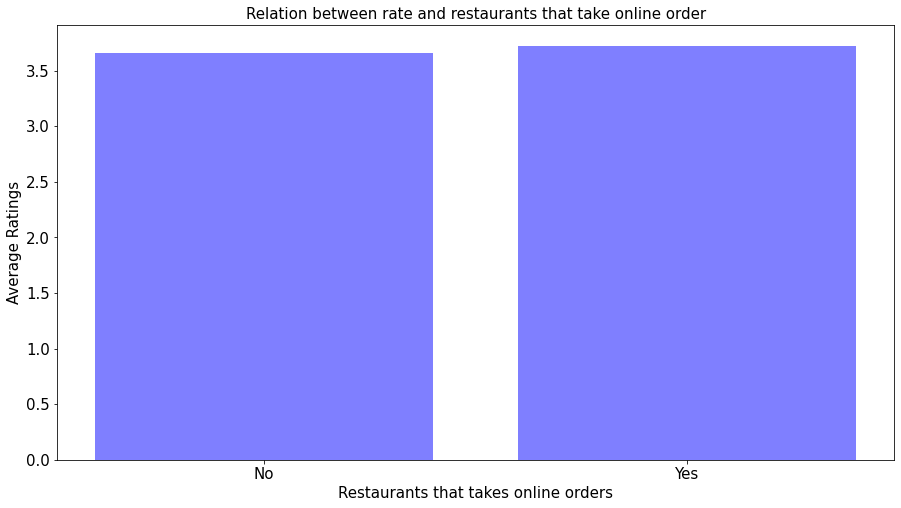

In [36]:
ro=df.groupby('online_order')['rate'].mean().reset_index()
plt.figure(figsize=(15,8))
plt.bar(ro['online_order'],ro['rate'],alpha=0.5,color='blue')
plt.xlabel('Restaurants that takes online orders',size=15)
plt.ylabel('Average Ratings',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Relation between rate and restaurants that take online order',size=15)
plt.show()

Best restaurant chains based on popularity

Text(0.5, 0, 'Number of outlets')

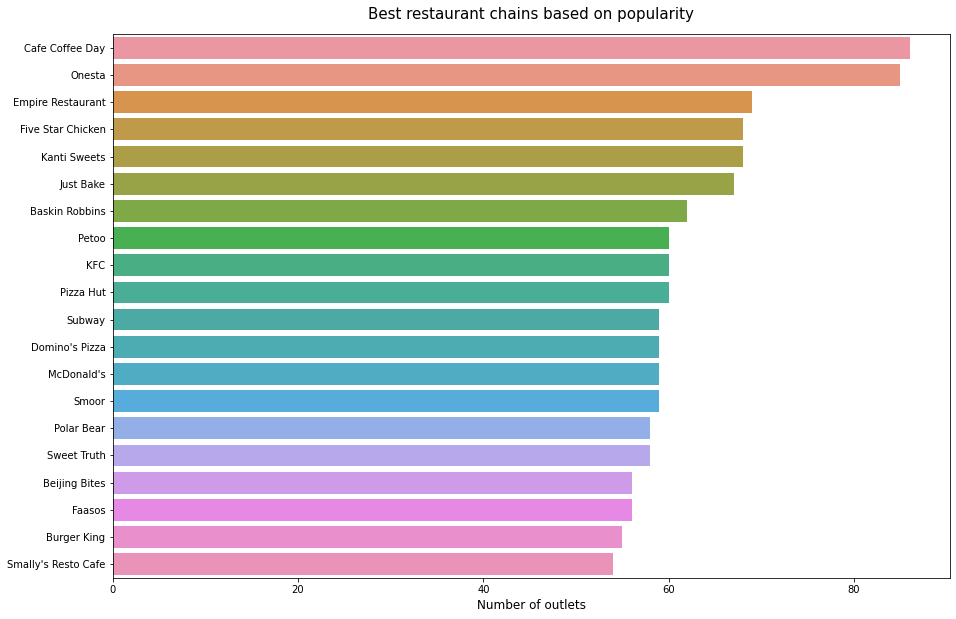

In [37]:
plt.figure(figsize=(15,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index)
plt.title("Best restaurant chains based on popularity",size=15,pad=15)
plt.xlabel("Number of outlets",size=12)

Restaurants with high ratings

In [38]:
hr=df.groupby('name')['rate'].mean().reset_index().sort_values(by='rate',ascending=False)[0:15]
print(hr)

                                                   name      rate
4924  SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...  4.900000
949                         Byg Brewski Brewing Company  4.900000
425                      Asia Kitchen By Mainland China  4.900000
4476                                       Punjab Grill  4.871429
630                              Belgian Waffle Factory  4.844828
1993                                           Flechazo  4.800000
6019                                   The Pizza Bakery  4.800000
4131                                 O.G. Variar & Sons  4.800000
92                            AB's - Absolute Barbecues  4.789474
708                                          Biergarten  4.766667
962                                                 CTR  4.750000
577                            Barbecue by Punjab Grill  4.750000
5786                                    The Black Pearl  4.727778
2574                                   House Of Commons  4.723810
6531      

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


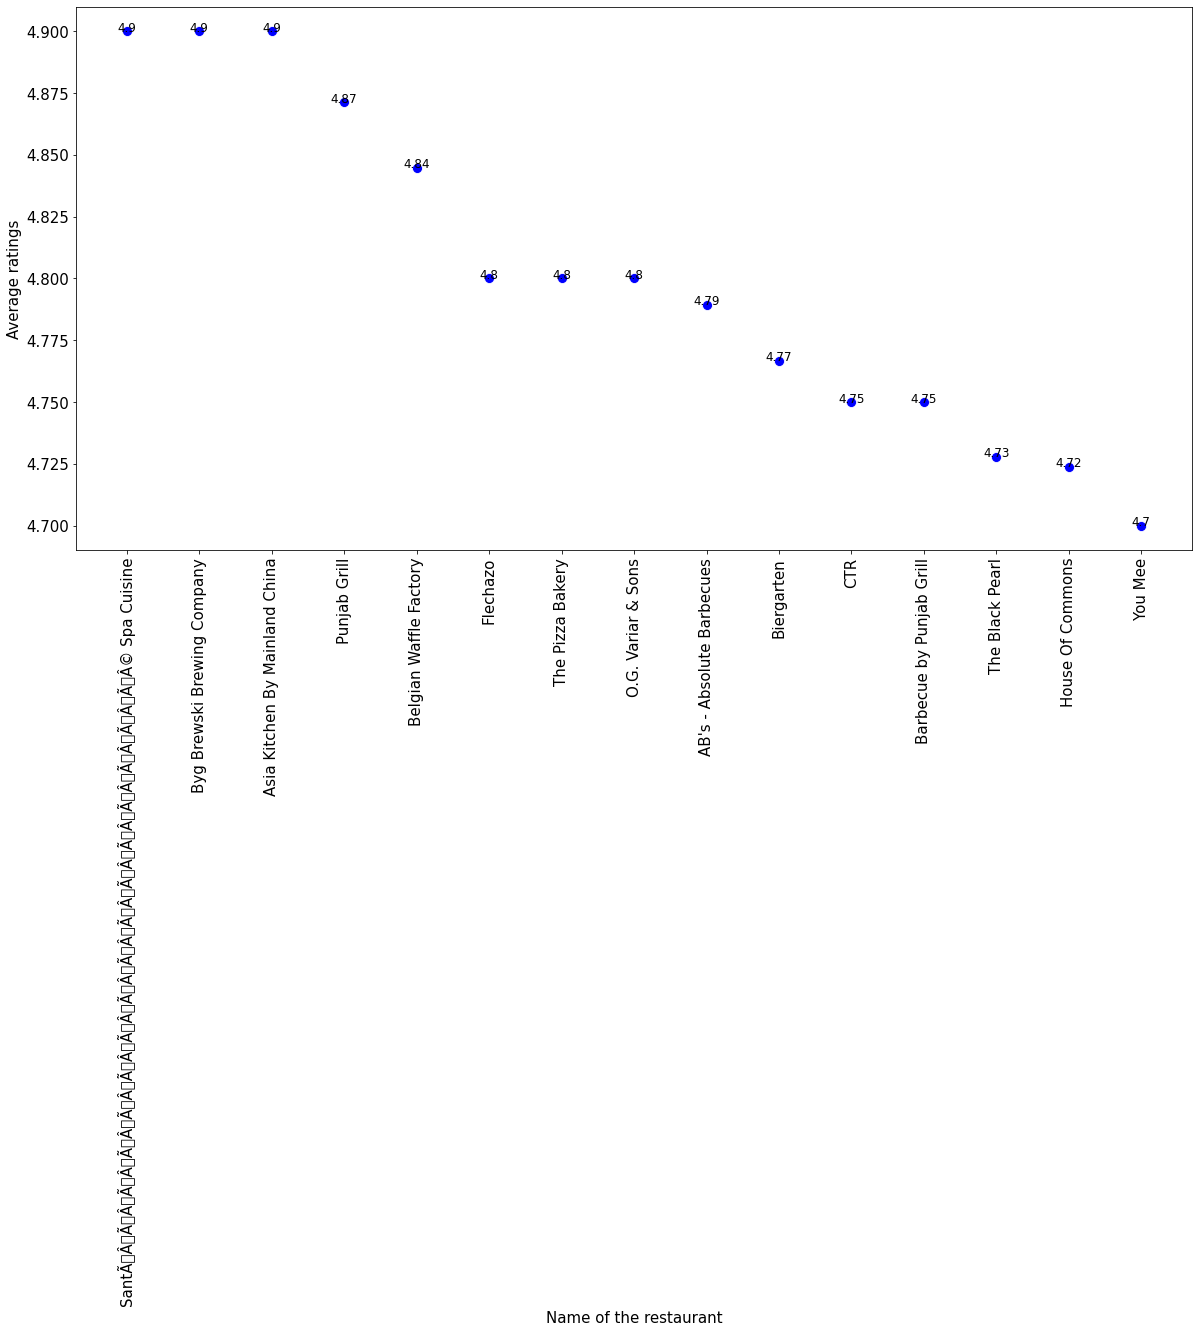

In [39]:
plt.figure(figsize=(20,10))
sns.scatterplot(hr.name,hr.rate,s=100,color='blue')
for a,b in enumerate(hr.rate):
    plt.text(a,b,round(b,2),fontsize=12,horizontalalignment='center')
plt.xlabel('Name of the restaurant',size=15)
plt.ylabel('Average ratings',size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.show()

**Models**

Encoding input variables

In [40]:
def enc(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df2 = enc(df.copy())
df2.head(10)

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,0,0,0,4.1,775,0,0,800.0,0,0
1,1,0,1,4.1,787,0,1,800.0,0,0
2,2,0,1,3.8,918,1,2,800.0,0,0
3,3,1,1,3.7,88,2,3,300.0,0,0
4,4,1,1,3.8,166,0,4,600.0,0,0
5,5,0,1,3.8,286,0,5,600.0,0,0
6,6,1,1,3.6,8,0,6,800.0,0,0
7,7,0,0,4.6,2556,3,7,600.0,1,0
8,8,0,1,4.0,324,4,8,700.0,1,0
9,9,0,1,4.2,504,4,9,550.0,1,0


Correlation between two variables

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'cuisines', 'cost', 'type', 'city'],
      dtype='object')

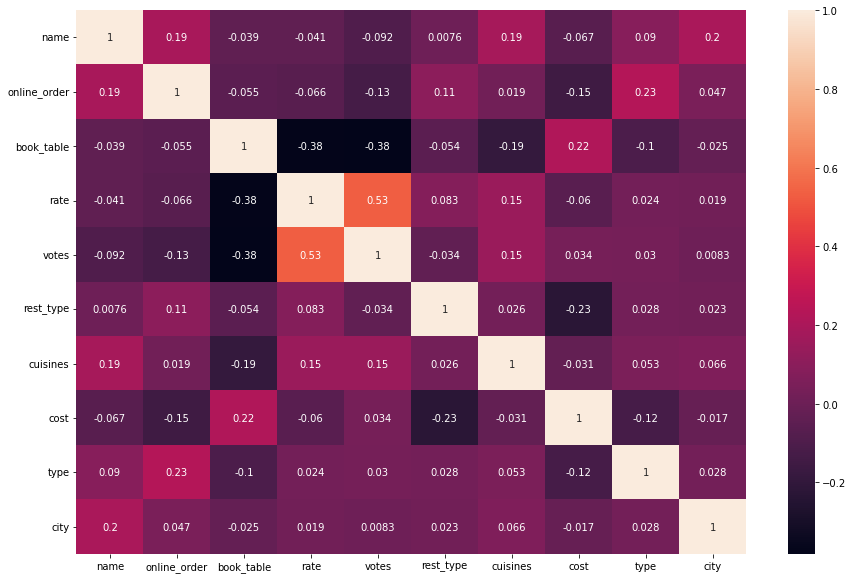

In [41]:
correlation = df2.corr(method='kendall')
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True)
df2.columns

In [42]:
df2.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
rest_type       0
cuisines        0
cost            0
type            0
city            0
dtype: int64

In [43]:
x = pd.DataFrame(index=range(df2.shape[0]), columns=['name','online_order','book_table','rate',
            'votes','rest_type','cuisines','cost','type','city'])
x = pd.DataFrame(df2, dtype=None, copy=False, index = x.index, columns=x.columns )
y = pd.DataFrame(df2, dtype=None, copy=False, index = x.index, columns=['rate'] )
x.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,0.0,0.0,0.0,4.1,775.0,0.0,0.0,800.0,0.0,0.0
1,1.0,0.0,1.0,4.1,787.0,0.0,1.0,800.0,0.0,0.0
2,2.0,0.0,1.0,3.8,918.0,1.0,2.0,800.0,0.0,0.0
3,3.0,1.0,1.0,3.7,88.0,2.0,3.0,300.0,0.0,0.0
4,4.0,1.0,1.0,3.8,166.0,0.0,4.0,600.0,0.0,0.0


In [44]:
x=x.dropna(inplace=False)
x.reset_index(inplace=True)
x = x.iloc[:,1:]
x

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,0.0,0.0,0.0,4.1,775.0,0.0,0.0,800.0,0.0,0.0
1,1.0,0.0,1.0,4.1,787.0,0.0,1.0,800.0,0.0,0.0
2,2.0,0.0,1.0,3.8,918.0,1.0,2.0,800.0,0.0,0.0
3,3.0,1.0,1.0,3.7,88.0,2.0,3.0,300.0,0.0,0.0
4,4.0,1.0,1.0,3.8,166.0,0.0,4.0,600.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
32748,2834.0,0.0,1.0,3.8,49.0,2.0,449.0,300.0,2.0,22.0
32749,1426.0,1.0,1.0,3.6,94.0,4.0,648.0,700.0,2.0,22.0
32750,5988.0,0.0,1.0,3.8,93.0,13.0,449.0,300.0,2.0,22.0
32751,2835.0,1.0,1.0,3.7,64.0,2.0,33.0,150.0,2.0,22.0


In [45]:
y=y.dropna(inplace=False)
y.reset_index(inplace=True)
y = y.iloc[:,1:]
y

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8
...,...
32748,3.8
32749,3.6
32750,3.8
32751,3.7


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

1. Linear Regression

In [129]:
mod1= LinearRegression()
mod1.fit(x_train,y_train)
y_pred=mod1.predict(x_test)

r2_score(y_test,y_pred)

0.46278982602915253

2. Random Forest Regression

In [130]:
from sklearn.ensemble import RandomForestRegressor

mod2 = RandomForestRegressor(n_estimators=50)
mod2.fit(x_train,y_train.values.ravel())
y_pred=mod2.predict(x_test)

r2_score(y_test,y_pred)

0.9003010288504153

3. XGB Regression

In [131]:
from xgboost import XGBRegressor

mod3 = XGBRegressor(objective ='reg:squarederror', booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 30)
mod3.fit(x_train, y_train)
y_pred=mod3.predict(x_test)

r2_score(y_test,y_pred)


0.9345585212968381

4. Gradient Boosting Regression

In [132]:
from sklearn.ensemble import GradientBoostingRegressor

mod4 = GradientBoostingRegressor()
mod4.fit(x_train, y_train)
y_pred=mod4.predict(x_test)

r2_score(y_test,y_pred)

0.9192229012376005

5. Decision Tree Regression

In [134]:
from sklearn.tree import DecisionTreeRegressor

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.4,random_state=105)

mod5 = DecisionTreeRegressor(min_samples_leaf=.0001)
mod5.fit(x_train,y_train)
y_pred=mod5.predict(x_test)

r2_score(y_test,y_pred)

0.8769349516129129

6. PCA

In [52]:
from sklearn.preprocessing import StandardScaler

df3 = StandardScaler().fit_transform(x)
df3 = pd.DataFrame(df3, dtype=None, copy=False, index = x.index, columns=x.columns)

df3

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,-1.447541,-0.697284,-2.399744,0.906692,0.483456,-0.641456,-0.875980,1.768769,-2.395531,-1.870829
1,-1.446911,-0.697284,0.416711,0.906692,0.497070,-0.641456,-0.874178,1.768769,-2.395531,-1.870829
2,-1.446282,-0.697284,0.416711,0.218154,0.645689,-0.558247,-0.872376,1.768769,-2.395531,-1.870829
3,-1.445652,1.434135,0.416711,-0.011359,-0.295945,-0.475038,-0.870574,-0.311866,-2.395531,-1.870829
4,-1.445022,1.434135,0.416711,0.218154,-0.207454,-0.641456,-0.868772,0.936515,-2.395531,-1.870829
...,...,...,...,...,...,...,...,...,...,...
32748,0.337020,-0.697284,0.416711,0.218154,-0.340190,-0.475038,-0.066951,-0.311866,-0.662968,1.674037
32749,-0.549593,1.434135,0.416711,-0.240872,-0.289138,-0.308620,0.291616,1.352642,-0.662968,1.674037
32750,2.323085,-0.697284,0.416711,0.218154,-0.290272,0.440261,-0.066951,-0.311866,-0.662968,1.674037
32751,0.337650,1.434135,0.416711,-0.011359,-0.323173,-0.475038,-0.816519,-0.936056,-0.662968,1.674037


In [53]:
from sklearn.decomposition import PCA

pca = PCA()
p = pca.fit_transform(df3)

pc = pd.DataFrame(pca.components_.T , index = df3.columns
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
principalDf = pd.DataFrame(p, index = df3.index, columns = pc.columns)
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.563789,3.621688,0.943732,0.463484,-0.328087,2.125101,-0.187024,-1.393100,1.234156,-0.528786
1,-1.845066,2.980633,0.867028,0.312518,-0.534535,1.618106,0.874337,-0.249976,-0.530553,-0.463748
2,-2.034098,2.786084,0.720236,0.236972,-0.621192,1.636008,0.953342,0.111545,-0.023508,-0.443754
3,-1.503938,1.433334,-1.159972,-0.697762,-0.245225,2.759800,0.332255,-0.215703,-0.663752,0.551909
4,-1.794917,1.618087,-0.538227,0.115142,-0.279404,2.812396,0.881960,-0.580980,-0.539861,0.391936
...,...,...,...,...,...,...,...,...,...,...
32748,-0.284959,-0.515983,1.378152,-1.046634,0.810132,-0.476354,-0.258456,-0.008002,-0.345758,0.307027
32749,-0.568243,-0.958416,1.000155,0.334282,0.710607,0.669642,1.369008,-0.626860,0.223437,1.517221
32750,0.479651,-1.643261,1.598591,-1.442410,0.475086,-0.439210,0.072670,-0.059535,-0.332180,-1.273473
32751,-0.073056,-1.305460,-0.014942,-1.066764,1.792341,0.781882,0.167301,-0.202343,-0.481729,0.697761


In [54]:
pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
name,0.211433,-0.582169,0.235368,-0.015882,-0.013246,0.134121,-0.119662,0.036368,-0.063304,-0.723127
online_order,0.174268,-0.394661,-0.395819,0.222316,0.202259,0.597125,0.297726,-0.163183,-0.096035,0.292946
book_table,-0.457147,-0.228876,-0.028027,-0.054610,-0.074069,-0.180714,0.375594,0.402327,-0.627082,0.023492
rate,0.405845,0.351835,0.204614,0.101367,0.135404,-0.027757,0.018878,-0.392596,-0.693445,-0.070007
votes,0.404831,0.318144,0.109734,0.187944,0.248917,0.135293,0.281888,0.708717,0.118626,-0.107027
rest_type,0.354509,0.014276,-0.275860,-0.408190,-0.350884,-0.257820,0.606044,-0.173867,0.145725,-0.151843
cuisines,0.339208,-0.222677,0.327226,0.162099,-0.674699,0.028374,-0.135532,0.176501,-0.074807,0.436874
cost,-0.289733,0.063277,0.415279,0.564568,-0.115712,0.003166,0.497928,-0.294110,0.237887,-0.128195
type,0.204617,-0.214805,-0.398061,0.562047,0.112077,-0.639816,-0.122950,0.020961,0.008684,-0.009230
city,0.144197,-0.357771,0.468135,-0.272424,0.518505,-0.311563,0.165665,-0.073807,0.122890,0.379379


In [55]:
pv = pd.DataFrame(pca.explained_variance_ratio_*100 , columns = ['Preserved % Variance']
             , index = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pv['Cumulative % Variance'] = pv['Preserved % Variance'].cumsum()
pv

,Preserved % Variance,Cumulative % Variance
PC1,22.907073,22.907073
PC2,15.757831,38.664905
PC3,13.357206,52.022110
PC4,9.125606,61.147717
PC5,7.930289,69.078006
PC6,7.573941,76.651947
PC7,7.356300,84.008247
PC8,5.614870,89.623117
PC9,5.364277,94.987395
PC10,5.012605,100.000000


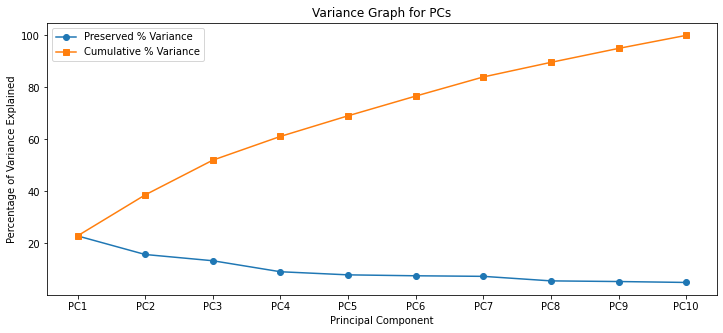

In [56]:
plt.figure(figsize=(12,5))
plt.plot(pv.index, pv['Preserved % Variance'], '-o')
plt.plot(pv.index, pv['Cumulative % Variance'], '-s')
plt.xticks(pv.index)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.legend(['Preserved % Variance','Cumulative % Variance'])
plt.title('Variance Graph for PCs')

plt.show()

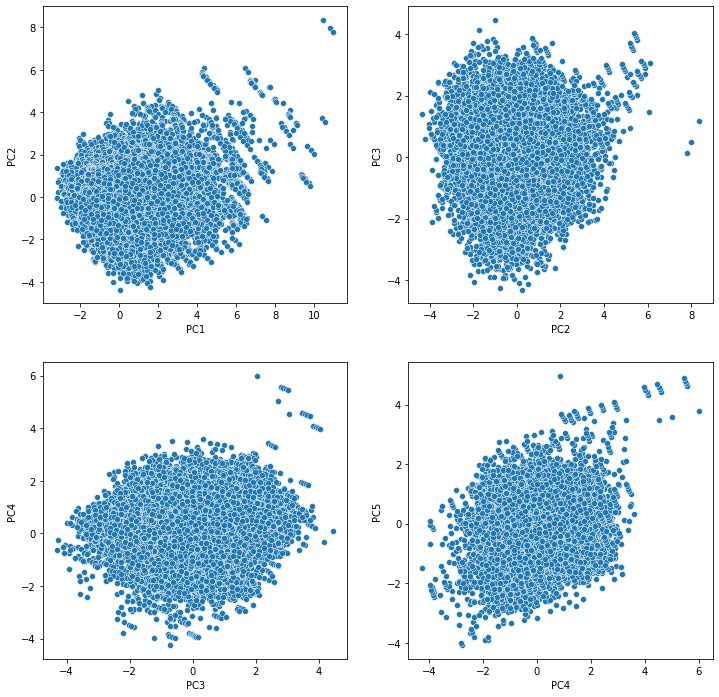

In [57]:
fig1, axes1 = plt.subplots(nrows =2, ncols=2, figsize=(12,12))

sns.scatterplot(x=principalDf.iloc[:,0],y=principalDf.iloc[:,1],ax=axes1[0][0],ci=0)
sns.scatterplot(x=principalDf.iloc[:,1],y=principalDf.iloc[:,2],ax=axes1[0][1],ci=0)
sns.scatterplot(x=principalDf.iloc[:,2],y=principalDf.iloc[:,3],ax=axes1[1][0],ci=0)
sns.scatterplot(x=principalDf.iloc[:,3],y=principalDf.iloc[:,4],ax=axes1[1][1],ci=0)
plt.show()

In [135]:
Xpca_Train, Xpca_Test, Ypca_Train, Ypca_Test = train_test_split(principalDf, y, test_size = 0.10, random_state = 0)

mod6 = RandomForestRegressor(n_estimators=50,min_samples_leaf=.0001)
mod6.fit(Xpca_Train,Ypca_Train)
ypca_predict=mod6.predict(Xpca_Test)

r2_score(Ypca_Test,ypca_predict)

0.9909884552353223

**K-fold cross validation**

In [136]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=12)

In [137]:
predictions = cross_val_predict(mod6, principalDf, y, cv=12)
predictions

array([4.02650835, 4.01893765, 3.87021241, ..., 3.71667536, 3.7266381 ,
       3.51607352])

In [138]:
validation_score = cross_val_score(mod6, principalDf, y, cv=12)
print("Cross-validated scores:", validation_score)

Cross-validated scores: [0.97627922 0.9836952  0.985372   0.98863138 0.9877835  0.98494741
 0.98765709 0.98603631 0.99426227 0.99525894 0.99070369 0.96497128]


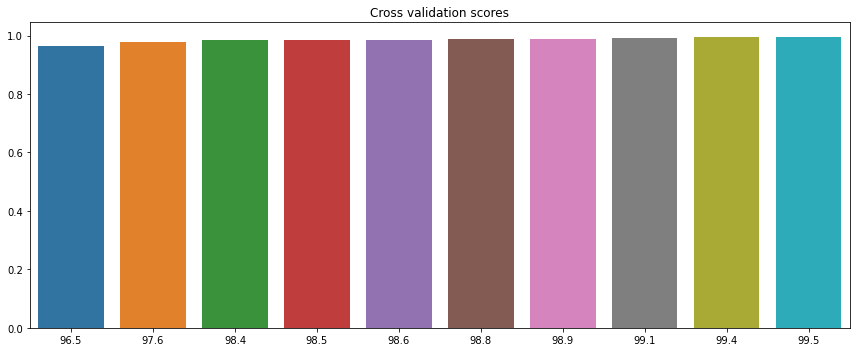

In [140]:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=np.around(validation_score,decimals=3)*100, y=validation_score,ax=ax)
plt.title('Cross validation scores')
plt.tight_layout()
plt.show()